# Advanced Video Analytics

The tutorial shows some techniques for developing advanced video analytics applications.

### Setup the environment variables, download model files and import dependencies

In [62]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import os
import time
import sys
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parent.parent.parent))
from demoTools.demoutils import *

In [63]:
!/opt/intel/openvino/bin/setupvars.sh

[setupvars.sh] OpenVINO environment initialized


In [36]:
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name person-detection-retail-0013 -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name face-detection-adas-0001 -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name face-detection-adas-0001 -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name head-pose-estimation-adas-0001 -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name age-gender-recognition-retail-0013  -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name emotions-recognition-retail-0003  -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name facial-landmarks-35-adas-0002  -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name mobilenet-ssd -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name vehicle-license-plate-detection-barrier-0106 -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name vehicle-attributes-recognition-barrier-0039 -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name license-plate-recognition-barrier-0001 -o models

################|| Downloading models ||################

========== Downloading models/intel/person-detection-retail-0013/FP32/person-detection-retail-0013.xml
... 100%, 152 KB, 2174 KB/s, 0 seconds passed

========== Downloading models/intel/person-detection-retail-0013/FP32/person-detection-retail-0013.bin
... 100%, 2823 KB, 16399 KB/s, 0 seconds passed

========== Downloading models/intel/person-detection-retail-0013/FP16/person-detection-retail-0013.xml
... 100%, 152 KB, 5417 KB/s, 0 seconds passed

========== Downloading models/intel/person-detection-retail-0013/FP16/person-detection-retail-0013.bin
... 100%, 1411 KB, 30416 KB/s, 0 seconds passed

========== Downloading models/intel/person-detection-retail-0013/INT8/person-detection-retail-0013.xml
... 100%, 1950 KB, 9406 KB/s, 0 seconds passed

========== Downloading models/intel/person-detection-retail-0013/INT8/person-detection-retail-0013.bin
... 100%, 2823 KB, 16531 KB/s, 0 seconds passed

################|| Post-processing 

... 100%, 2445 KB, 28748 KB/s, 0 seconds passed

========== Downloading models/intel/vehicle-attributes-recognition-barrier-0039/FP16/vehicle-attributes-recognition-barrier-0039.xml
... 100%, 17 KB, 79621 KB/s, 0 seconds passed

========== Downloading models/intel/vehicle-attributes-recognition-barrier-0039/FP16/vehicle-attributes-recognition-barrier-0039.bin
... 100%, 1222 KB, 30921 KB/s, 0 seconds passed

========== Downloading models/intel/vehicle-attributes-recognition-barrier-0039/INT8/vehicle-attributes-recognition-barrier-0039.xml
... 100%, 62 KB, 3261 KB/s, 0 seconds passed

========== Downloading models/intel/vehicle-attributes-recognition-barrier-0039/INT8/vehicle-attributes-recognition-barrier-0039.bin
... 100%, 2445 KB, 29921 KB/s, 0 seconds passed

################|| Post-processing ||################

################|| Downloading models ||################

========== Downloading models/intel/license-plate-recognition-barrier-0001/FP32/license-plate-recognition-barrier-0

In [40]:
! python3 /opt/intel/openvino/deployment_tools/model_optimizer/mo_caffe.py --input_model models/public/mobilenet-ssd/mobilenet-ssd.caffemodel -o models/object_detection/common/mobilenet-ssd/FP32/ --scale 256 --mean_values [127,127,127]

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/home/u30239/Smart_video_review/iot-devcloud/smart-video-workshop/advanced-video-analytics/devcloud/cpp/models/public/mobilenet-ssd/mobilenet-ssd.caffemodel
	- Path for generated IR: 	/home/u30239/Smart_video_review/iot-devcloud/smart-video-workshop/advanced-video-analytics/devcloud/cpp/models/object_detection/common/mobilenet-ssd/FP32/
	- IR output name: 	mobilenet-ssd
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	Not specified, inherited from the model
	- Mean values: 	[127,127,127]
	- Scale values: 	Not specified
	- Scale factor: 	256.0
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	False
	- Reverse input channels: 	False
Caffe specific parameters:
	- Path to P

## Part 1. Chaining models: Use mutiple models in an application

The Intel® Distribution of OpenVINO™ toolkit package includes security barrier sample which uses 3 models to detect cars, their number plates, color and number plate attributes from the input video or image of the cars. The sample demo script is provided in the Intel® Distribution of OpenVINO™ toolkit package to run the sample.

### 2. Run the executable for the security barrier sample with the mobilenet-ssd* model used in the first tutorial

We will be using the below image in this example to detect multiple attributes from the input image.  

In [ ]:
Image(filename='car_1.png')

In [53]:
!./security_barrier_camera_demo -h

[ INFO ] InferenceEngine: 
	API version ............ 2.1
	Build .................. custom_releases/2019/R3_cb6cad9663aea3d282e0e8b3e0bf359df665d5d0
	Description ....... API

interactive_vehicle_detection [OPTION]
Options:

    -h                         Print a usage message.
    -i "<path1>" "<path2>"     Required for video or image files input. Path to video or image files.
    -m "<path>"                Required. Path to the Vehicle and License Plate Detection model .xml file.
    -m_va "<path>"             Optional. Path to the Vehicle Attributes model .xml file.
    -m_lpr "<path>"            Optional. Path to the License Plate Recognition model .xml file.
      -l "<absolute_path>"     Required for CPU custom layers. Absolute path to a shared library with the kernels implementation.
          Or
      -c "<absolute_path>"     Required for GPU custom kernels. Absolute path to an .xml file with the kernels description.
    -d "<device>"              Optional. Specify the target dev

In [64]:
!./security_barrier_camera_demo -i car_1.png -m models/intel/vehicle-license-plate-detection-barrier-0106/FP32/vehicle-license-plate-detection-barrier-0106.xml -d CPU

[ INFO ] InferenceEngine: 
	API version ............ 2.1
	Build .................. custom_releases/2019/R3_cb6cad9663aea3d282e0e8b3e0bf359df665d5d0
	Description ....... API
[ INFO ] Files were added: 1
[ INFO ]     car_1.png
[ INFO ] Loading device CPU
	CPU
	MKLDNNPlugin version ......... 2.1
	Build ........... 30677

[ INFO ] Loading detection model to the CPU plugin
Segmentation fault


In [88]:
%%writefile security.sh
cd $PBS_O_WORKDIR
DEVICE=$1
./security_barrier_camera_demo -i car_1.png \
                                -m models/intel/vehicle-license-plate-detection-barrier-0106/FP32/vehicle-license-plate-detection-barrier-0106.xml \ 
                                -d CPU

Overwriting security.sh


In [89]:
job_id_core = !qsub security.sh -l nodes=1:tank-870:i5-6500te -F "CPU" -N obj_det_core
print(job_id_core[0])
while True:
    var=job_id_core[0].split(".")
    file="obj_det_core.o"+var[0]
    if os.path.isfile(file): 
        ! cat $file
        break

4873.v-qsvr-1.devcloud-edge

########################################################################
#      Date:           Wed Nov 20 05:28:58 PST 2019
#    Job ID:           4873.v-qsvr-1.devcloud-edge
#      User:           u30239
# Resources:           neednodes=1:tank-870:i5-6500te,nodes=1:tank-870:i5-6500te,walltime=01:00:00
########################################################################

[setupvars.sh] OpenVINO environment initialized
[ INFO ] InferenceEngine: 
	API version ............ 2.1
	Build .................. custom_releases/2019/R3_cb6cad9663aea3d282e0e8b3e0bf359df665d5d0
	Description ....... API
[ INFO ] Files were added: 1
[ INFO ]     car_1.png
[ INFO ] Loading device CPU
	CPU
	MKLDNNPlugin version ......... 2.1
	Build ........... 30677

[ INFO ] Loading detection model to the CPU plugin
[ INFO ] Number of InferRequests: 1 (detection), 0 (classification), 0 (recognition)
[ INFO ] 4 streams for CPU
[ INFO ] Display resolution: 1920x1080
[ INFO ] Number of all

### 2.1.See the Output

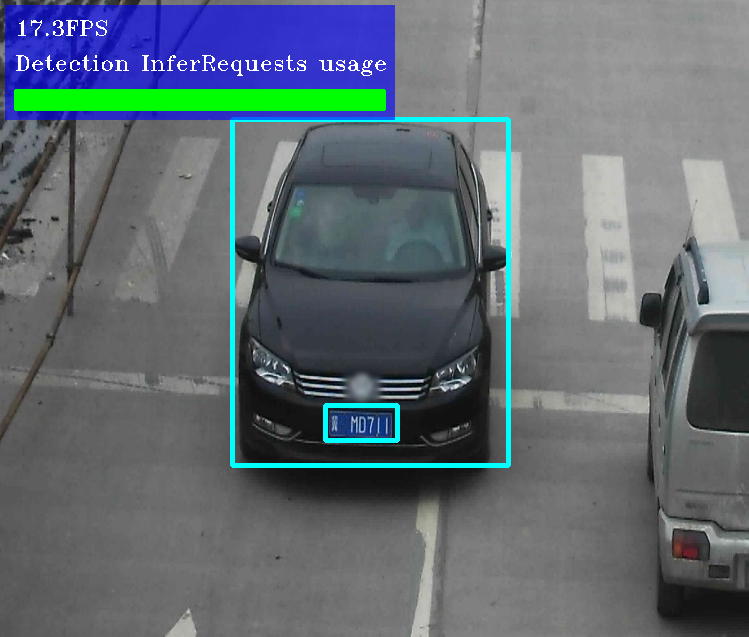

In [90]:
Image(filename='output.png')

### 3. Run the security camera sample with Intel optimized pre-trained models

Above script below run the security barrier camera example with Intel® pretrained models. In the script flags, you can see that the sample uses three pretrained models, vehicle-license-plate-detection-barrier, vehicle-attributes-recognition-barrier and license-plate-recognition-barrier to detect the car, it's make, color and license plate attributes. These pretrained models are optimized for particular tasks which yield better performance over generic object detection models. You can find more of such pretrained models under /opt/intel/openvino/deployment_tools/intel_models.

In [ ]:
! ./security_barrier -i car_1.png  -m models/Security/object_detection/barrier/0106/dldt/vehicle-license-plate-detection-barrier-0106.xml -m_va models/Security/object_attributes/vehicle/resnet10_update_1/dldt/vehicle-attributes-recognition-barrier-0039.xml -m_lpr models/Security/optical_character_recognition/license_plate/dldt/license-plate-recognition-barrier-0001.xml -d CPU

In [91]:
%%writefile security_intel_models.sh
cd $PBS_O_WORKDIR
DEVICE=$1
./security_barrier_camera_demo -i car_1.png \
                                -m models/intel/vehicle-license-plate-detection-barrier-0106/FP32/vehicle-license-plate-detection-barrier-0106.xml \
                                -m_lpr models/intel/license-plate-recognition-barrier-0001/FP32/license-plate-recognition-barrier-0001.xml \
                                -d CPU

Writing security_intel_models.sh


In [92]:
job_id_core = !qsub security_intel_models.sh -l nodes=1:tank-870:i5-6500te -F "CPU" -N obj_det_core
print(job_id_core[0])
while True:
    var=job_id_core[0].split(".")
    file="obj_det_core.o"+var[0]
    if os.path.isfile(file): 
        ! cat $file
        break

4875.v-qsvr-1.devcloud-edge

########################################################################
#      Date:           Wed Nov 20 05:33:00 PST 2019
#    Job ID:           4875.v-qsvr-1.devcloud-edge
#      User:           u30239
# Resources:           neednodes=1:tank-870:i5-6500te,nodes=1:tank-870:i5-6500te,walltime=01:00:00
########################################################################

[setupvars.sh] OpenVINO environment initialized
[ INFO ] InferenceEngine: 
	API version ............ 2.1
	Build .................. custom_releases/2019/R3_cb6cad9663aea3d282e0e8b3e0bf359df665d5d0
	Description ....... API
[ INFO ] Files were added: 1
[ INFO ]     car_1.png
[ INFO ] Loading device CPU
	CPU
	MKLDNNPlugin version ......... 2.1
	Build ........... 30677

[ INFO ] Loading detection model to the CPU plugin
[ INFO ] Loading Licence Plate Recognition (LPR) model to the CPU plugin
[ INFO ] Number of InferRequests: 1 (detection), 0 (classification), 3 (recognition)
[ INFO ] 4 stre

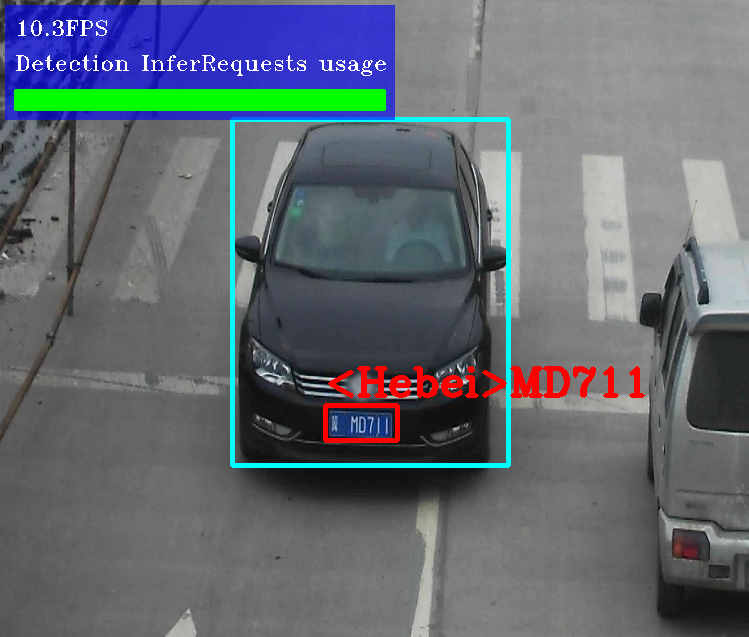

In [93]:
Image(filename='output.png')

## Part 2. Use multiple models on different hardware

### 0. Initialize the environmental variables

In [66]:
!/opt/intel/openvino/bin/setupvars.sh

[setupvars.sh] OpenVINO environment initialized


### 1. Let's look at the face detection sample from the Intel® Distribution of OpenVINO™ toolkit package

In [67]:
!./interactive_face_detection_demo -h

InferenceEngine: 
	API version ............ 2.1
	Build .................. custom_releases/2019/R3_cb6cad9663aea3d282e0e8b3e0bf359df665d5d0
	Description ....... API

interactive_face_detection [OPTION]
Options:

    -h                         Print a usage message
    -i "<path>"                Required. Path to a video file (specify "cam" to work with camera).
    -o "<path>"                Optional. Path to an output video file.
    -m "<path>"                Required. Path to an .xml file with a trained Face Detection model.
    -m_ag "<path>"             Optional. Path to an .xml file with a trained Age/Gender Recognition model.
    -m_hp "<path>"             Optional. Path to an .xml file with a trained Head Pose Estimation model.
    -m_em "<path>"             Optional. Path to an .xml file with a trained Emotions Recognition model.
    -m_lm "<path>"             Optional. Path to an .xml file with a trained Facial Landmarks Estimation model.
      -l "<absolute_path>"     Require

### 2. Set path to the Input Video

In [68]:
os.environ["VIDEO"] = "faces-recognition-walking-and-pause.mp4"

We will be using the below video in this example to detect multiple features from the input video.  

In [69]:
videoHTML('Sample Video', 
          ['faces-recognition-walking-and-pause.mp4'])

### 3. Run the face demo, face detection only, on the Intel® Movidius™ Neural Compute stick


#### Create Job Script 

We will run the workload on several DevCloud's edge compute nodes. We will send work to the edge compute nodes by submitting jobs into a queue. For each job, we will specify the type of the edge compute server that must be allocated for the job.

To pass the specific variables to the Python code, we will use following arguments:

* `-1`&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Location of the output file 
* `-2`&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Location of the input video

The job file will be executed directly on the edge compute node.

The input arguments are as follows:
* --name : name of the model you want to download. It should be one of the models listed in the previous cell
* -o : output directory. If this directory does not exist, it will be created for you.

There are more arguments to this script and you can get the full list using the `-h` option.


### Running the inference

Now we are ready to run the inference workload. In this step we will be submitting the workload as a job to the job queue.

Currently, you are on what is called a "devnode". On this system, you are allocated just one core on a large Intel® Xeon® CPU. The purpose of this node is to develop code on the devnode and run minimal sections of Jupyter* Notebooks, but it is not meant for compute intensive jobs like deep learning inference. So we need to request additional resources from the cluster of Edge nodes to run the inference, and this is done through the job queue.

To put an item on the job queue, we must first create a bash script that run the workload we want. Run the following cell to create bash script infer_face.sh which will be our job script. 

In [70]:
%%writefile infer_face.sh
#PBS
INPUT_FILE=$1
DEVICE=$2
OUTPUT_FILE=$3

cd $PBS_O_WORKDIR
export LD_LIBRARY_PATH=${LD_LIBRARY_PATH}:/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/
    
./interactive_face_detection_demo -i $INPUT_FILE -no_wait \
-m models/intel/face-detection-adas-0001/FP16/face-detection-adas-0001.xml \
-d $DEVICE \
-o $OUTPUT_FILE

Overwriting infer_face.sh


In [72]:
#Submit job to the queue
job_id_ncs2 = !qsub infer_face.sh -l nodes=1:tank-870:i5-6500te:intel-ncs2 -F "$VIDEO MYRIAD results/ncs2_face/"
print(job_id_ncs2[0])

#Progress indicators
if job_id_ncs2:
    progressIndicator('results/ncs2_face', 'i_progress_'+job_id_ncs2[0]+'.txt', "Inference", 0, 100)

4855.v-qsvr-1.devcloud-edge


In [74]:
videoHTML('Face Detection [MYRIAD]',
          ['results/ncs2_face/output.mp4'])

### 4. Now we add (to the face detection) also an age and gender detection, running on the CPU

In [73]:
%%writefile infer_ag.sh
#PBS
INPUT_FILE=$1
DEVICE=$2
OUTPUT_FILE=$3

cd $PBS_O_WORKDIR
export LD_LIBRARY_PATH=${LD_LIBRARY_PATH}:/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/
    
./interactive_face_detection_demo -i $INPUT_FILE -no_wait \
-m models/intel/face-detection-adas-0001/FP16/face-detection-adas-0001.xml \
-m_ag models/intel/age-gender-recognition-retail-0013/FP32/age-gender-recognition-retail-0013.xml \
-d $DEVICE -d_ag CPU \
-o $OUTPUT_FILE

Overwriting infer_ag.sh


In [75]:
#Submit job to the queue
job_id_ncs2 = !qsub infer_ag.sh -l nodes=1:tank-870:i5-6500te:intel-ncs2 -F "$VIDEO MYRIAD results/ncs2_ag/"
print(job_id_ncs2[0])

#Progress indicators
if job_id_ncs2:
    progressIndicator('results/ncs2_ag', 'i_progress_'+job_id_ncs2[0]+'.txt', "Inference", 0, 100)

4857.v-qsvr-1.devcloud-edge


In [78]:
videoHTML('Face Detection [MYRIAD], Age/Gender [GPU]',
          ['results/ncs2_ag/output.mp4'])

### 5. Now we’ll add an head position detection, running on the GPU

In [76]:
%%writefile infer_hp.sh
#PBS
INPUT_FILE=$1
DEVICE=$2
OUTPUT_FILE=$3

cd $PBS_O_WORKDIR
export LD_LIBRARY_PATH=${LD_LIBRARY_PATH}:/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/
    
./interactive_face_detection_demo -i $INPUT_FILE -no_wait \
-m models/intel/face-detection-adas-0001/FP16/face-detection-adas-0001.xml \
-m_ag models/intel/age-gender-recognition-retail-0013/FP32/age-gender-recognition-retail-0013.xml \
-m_hp models/intel/head-pose-estimation-adas-0001/FP16/head-pose-estimation-adas-0001.xml \
-d $DEVICE -d_ag CPU -d_hp GPU \
-o $OUTPUT_FILE

Overwriting infer_hp.sh


In [77]:
#Submit job to the queue
job_id_ncs2 = !qsub infer_hp.sh -l nodes=1:tank-870:i5-6500te:intel-ncs2 -F "$VIDEO MYRIAD results/ncs2_hp/"
print(job_id_ncs2[0])

#Progress indicators
if job_id_ncs2:
    progressIndicator('results/ncs2_hp', 'i_progress_'+job_id_ncs2[0]+'.txt', "Inference", 0, 100)

4860.v-qsvr-1.devcloud-edge


In [81]:
videoHTML('Face Detection[MYRIAD] | Age/Gender[CPU] | Head Pose [GPU] :',
          ['results/ncs2_hp/output.mp4'])

### 6. Now we’ll add an emotion detector, running on the GPU

In [84]:
%%writefile infer_ed.sh
#PBS
INPUT_FILE=$1
DEVICE=$2
OUTPUT_FILE=$3

cd $PBS_O_WORKDIR
export LD_LIBRARY_PATH=${LD_LIBRARY_PATH}:/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/
    
./interactive_face_detection_demo -i $INPUT_FILE -no_wait \
-m models/intel/face-detection-adas-0001/FP16/face-detection-adas-0001.xml \
-m_ag models/intel/age-gender-recognition-retail-0013/FP32/age-gender-recognition-retail-0013.xml \
-m_hp models/intel/head-pose-estimation-adas-0001/FP16/head-pose-estimation-adas-0001.xml \
-m_em models/intel/emotions-recognition-retail-0003/FP16/emotions-recognition-retail-0003.xml \
-d $DEVICE -d_ag CPU -d_hp GPU -d_em GPU \
-o $OUTPUT_FILE

Overwriting infer_ed.sh


In [85]:
#Submit job to the queue
job_id_ncs2 = !qsub infer_ed.sh -l nodes=1:tank-870:i5-6500te:intel-ncs2 -F "$VIDEO MYRIAD results/ncs2_ed/"
print(job_id_ncs2[0])

#Progress indicators
if job_id_ncs2:
    progressIndicator('results/ncs2_ed', 'i_progress_'+job_id_ncs2[0]+'.txt', "Inference", 0, 100)

4865.v-qsvr-1.devcloud-edge


In [ ]:
videoHTML('Face Detection[MYRIAD] | Age/Gender[CPU] | Head Pose, Emotion [GPU]:',
          ['results/ncs2_ed/output_'+job_id_ncs2[0]+'.mp4'])

### Clean the output files before closing the lab
- point to the kernel in the header and click on *Restart & Clear Output* to clean the outputs of this page.